# Blob Segmentation

In this notebook, we will segment and label bright blobs in the provided microscopy image.

## Step 1: Load the Image

We start by loading the image `blobs.png` from the data folder.

In [1]:
import os
from skimage.io import imread

# Ensure the data folder exists and the image is in it
image_path = os.path.join('..', 'data', 'blobs.png')
image = imread(image_path)


## Step 2: Visualize the Image

Let's take a look at the loaded image to understand its content.

StackViewNDArray([[ 40,  32,  24, ..., 216, 200, 200],
                  [ 56,  40,  24, ..., 232, 216, 216],
                  [ 64,  48,  24, ..., 240, 232, 232],
                  ...,
                  [ 72,  80,  80, ...,  48,  48,  48],
                  [ 80,  80,  80, ...,  48,  48,  48],
                  [ 96,  88,  80, ...,  48,  48,  48]], dtype=uint8)
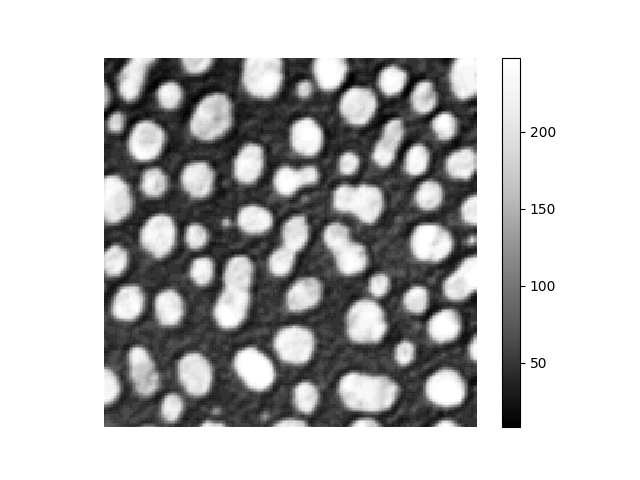
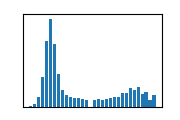

In [2]:
import stackview

stackview.insight(image)

## Step 3: Denoise the Image

We'll apply a median filter to reduce noise while preserving the edges of the blobs.

In [3]:
import napari_simpleitk_image_processing as nsitk

denoised_image = nsitk.median_filter(image, radius=2)

/opt/hostedtoolcache/Python/3.12.7/x64/lib/python3.12/site-packages/napari_tools_menu/__init__.py:10: UserWarning: Importing QT failed; now introducing dummy definitions of QMenu class and register_function decorator.
  warnings.warn("Importing QT failed; now introducing dummy definitions of QMenu class and register_function decorator.")
/opt/hostedtoolcache/Python/3.12.7/x64/lib/python3.12/site-packages/napari_tools_menu/__init__.py:221: UserWarning: Error in monkey patching napari. Please let @haesleinleinhuepf know at
https://github.com/haesleinhuepf/napari-tools-menu/issues
  warnings.warn("Error in monkey patching napari. Please let @haesleinleinhuepf know at\nhttps://github.com/haesleinhuepf/napari-tools-menu/issues")
/opt/hostedtoolcache/Python/3.12.7/x64/lib/python3.12/site-packages/napari_skimage_regionprops/_table.py:7: UserWarning: No Qt bindings could be found
  warnings.warn(str(e))


TypeError: got an unexpected keyword argument 'radius'

## Step 4: Apply Thresholding

We'll use Otsu's method to convert the denoised image into a binary image for segmentation.

In [ ]:
binary_image = nsitk.threshold_otsu(denoised_image)

## Step 5: Label the Blobs

Using the binary image, we will label the distinct blobs.

In [ ]:
labeled_blobs = nsitk.connected_component_labeling(binary_image)

## Step 6: Visualize the Labeled Blobs

Finally, we visualize the original and the labeled image using a blending technique.

In [ ]:
stackview.animate_curtain(image, labeled_blobs)

## Step 7: Save the Labeled Image

We save the labeled image to the data folder for future reference.

In [ ]:
from skimage.io import imsave

output_path = os.path.join('..', 'data', 'labeled_blobs.png')
imsave(output_path, labeled_blobs)